In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'oct2017:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5861947%2F9607437%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241012%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241012T091846Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D81932f3ca39ec3e10d2ec49d089be6fdeedcdffc4e42ba2d5cdcd3ce1dcd6bcc98782f7fe32348e525d6ebf2819dd3586e9588f65f9297cd6dbfd7b94c7aa8b32892013e7797d6f19533df1f6d07cec7e456bf7aa72f38ad8116e88b68c1cb331f80ea7b8df1a4ec556de9419684b5dba96298fad3b67ca35abee970c2a087ac0c0374700e25faa9f22d82595dfdb69f3777493d7274cbef7fda9bf7382201a3209a12bc368bb45d956cc81ac6c97138b4e68bcc007e4c47346831ac8f8b1cb33f5166b1b511476c4fef7ee4422149792aacf16cdf90692dc260074eafda9e2f85dd0b73affcd489ac572a637497767170b9d10cdbba7f59d99308aa3066396e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 13959916 bytes downloaded
Downloaded and uncompressed: oct2017
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/oct2017/OCT2017/val/DME/DME-9721607-2.jpeg
/kaggle/input/oct2017/OCT2017/val/DME/DME-9583225-1.jpeg
/kaggle/input/oct2017/OCT2017/val/DME/DME-9925591-1.jpeg
/kaggle/input/oct2017/OCT2017/val/DME/DME-9583225-2.jpeg
/kaggle/input/oct2017/OCT2017/val/DME/DME-9721607-1.jpeg
/kaggle/input/oct2017/OCT2017/val/DME/DME-9655949-1.jpeg
/kaggle/input/oct2017/OCT2017/val/DME/DME-9925591-2.jpeg
/kaggle/input/oct2017/OCT2017/val/DME/DME-9603124-1.jpeg
/kaggle/input/oct2017/OCT2017/val/DRUSEN/DRUSEN-9837663-1.jpeg
/kaggle/input/oct2017/OCT2017/val/DRUSEN/DRUSEN-9928043-1.jpeg
/kaggle/input/oct2017/OCT2017/val/DRUSEN/DRUSEN-9800172-2.jpeg
/kaggle/input/oct2017/OCT2017/val/DRUSEN/DRUSEN-9861332-1.jpeg
/kaggle/input/oct2017/OCT2017/val/DRUSEN/DRUSEN-9894035-1.jpeg
/kaggle/input/oct2017/OCT2017/val/DRUSEN/DRUSEN-9894035-2.jpeg
/kaggle/input/oct2017/OCT2017/val/DRUSEN/DRUSEN-9884539-1.jpeg
/kaggle/input/oct2017/OCT2017/val/DRUSEN/DRUSEN-9884539-2.jpeg
/kaggle/input/oct2017/OCT2017/val/NORMAL

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [4]:
train_path = '/kaggle/input/oct2017/OCT2017/train'
test_path = '/kaggle/input/oct2017/OCT2017/test'
val_path = '/kaggle/input/oct2017/OCT2017/val'

In [5]:
categories = ['CNV', 'DME', 'DRUSEN', 'NORMAL']

# EDA: Count number of images per category in each set
def count_images_in_directory(directory):
    category_count = {}
    for category in categories:
        category_path = os.path.join(directory, category)
        category_count[category] = len(os.listdir(category_path))
    return category_count

# Get image distribution for train, validation, and test sets
train_distribution = count_images_in_directory(train_path)
test_distribution = count_images_in_directory(test_path)
val_distribution = count_images_in_directory(val_path)

<ipython-input-6-8aeee494679d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(train_distribution.keys()), y=list(train_distribution.values()), palette="Blues")
<ipython-input-6-8aeee494679d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(val_distribution.keys()), y=list(val_distribution.values()), palette="Greens")
<ipython-input-6-8aeee494679d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(test_distribution.keys()), y=list(test_distribution.values()), palette="Reds")


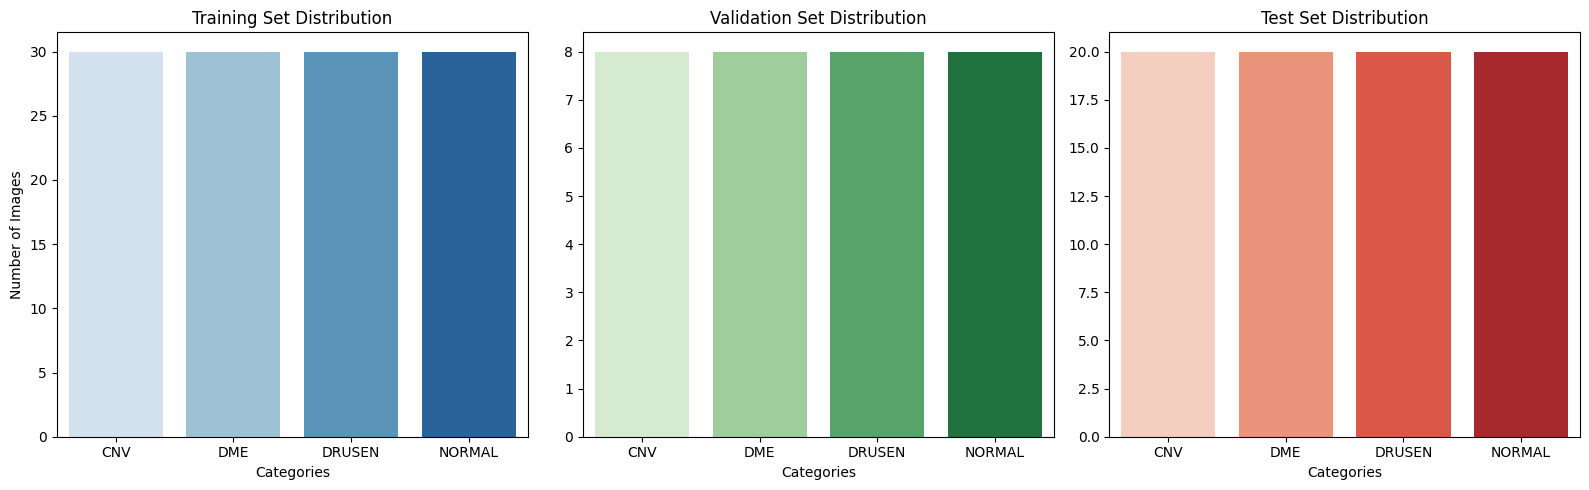

In [6]:
def plot_class_distribution():
    plt.figure(figsize=(16, 5))

    plt.subplot(1, 3, 1)
    sns.barplot(x=list(train_distribution.keys()), y=list(train_distribution.values()), palette="Blues")
    plt.title("Training Set Distribution")
    plt.xlabel("Categories")
    plt.ylabel("Number of Images")

    plt.subplot(1, 3, 2)
    sns.barplot(x=list(val_distribution.keys()), y=list(val_distribution.values()), palette="Greens")
    plt.title("Validation Set Distribution")
    plt.xlabel("Categories")

    plt.subplot(1, 3, 3)
    sns.barplot(x=list(test_distribution.keys()), y=list(test_distribution.values()), palette="Reds")
    plt.title("Test Set Distribution")
    plt.xlabel("Categories")

    plt.tight_layout()
    plt.show()

# Display class distribution plots
plot_class_distribution()

In [7]:
img_size = (128, 128)
batch_size = 32

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=10, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(train_path, target_size=img_size, batch_size=batch_size, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_path, target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_path, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 120 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.2496 - loss: 1.6767 - val_accuracy: 0.2500 - val_loss: 1.4202
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2337 - loss: 1.4504 - val_accuracy: 0.3125 - val_loss: 1.3881
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 969ms/step - accuracy: 0.3290 - loss: 1.3754 - val_accuracy: 0.3125 - val_loss: 1.3871
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3706 - loss: 1.3557 - val_accuracy: 0.4062 - val_loss: 1.3980
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.2749 - loss: 1.3753 - val_accuracy: 0.2812 - val_loss: 1.3926
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3365 - loss: 1.3475 - val_accuracy: 0.2812 - val_loss: 1.4230
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4216 - loss: 1.3022 - val_accuracy: 0.2500 - val_loss: 1.4691
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 944ms/step - accuracy: 0.4233 - loss: 1.2252 - val_accuracy: 0.1875 - val_loss: 1.5252
Epoch 9/10
4/4 ━━━━━━

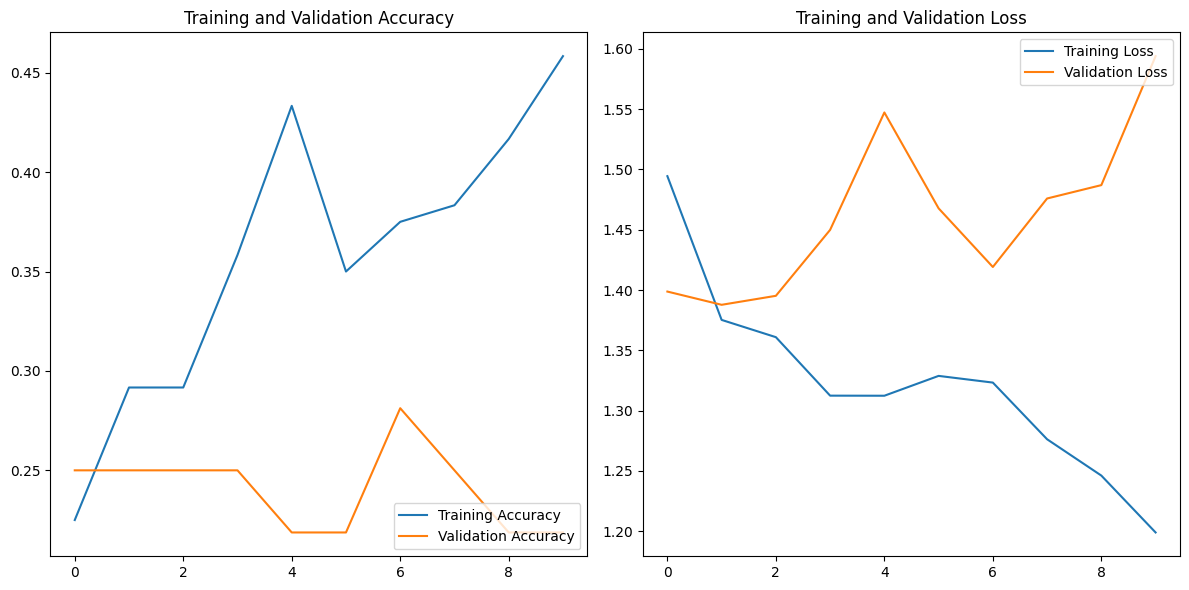

In [ ]:
def plot_learning_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.tight_layout()
    plt.show()

# Plot learning curves
plot_learning_curves(history)

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.2227 - loss: 1.6822
Test Accuracy: 25.00%


In [ ]:
# Predicting on the test set
test_predictions = model.predict(test_generator)
test_predictions_labels = np.argmax(test_predictions, axis=1)
true_labels = test_generator.classes

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step


In [ ]:
class_report = classification_report(true_labels, test_predictions_labels, target_names=categories)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         CNV       0.20      0.15      0.17        20
         DME       0.14      0.05      0.07        20
      DRUSEN       0.27      0.75      0.40        20
      NORMAL       0.33      0.05      0.09        20

    accuracy                           0.25        80
   macro avg       0.24      0.25      0.18        80
weighted avg       0.24      0.25      0.18        80



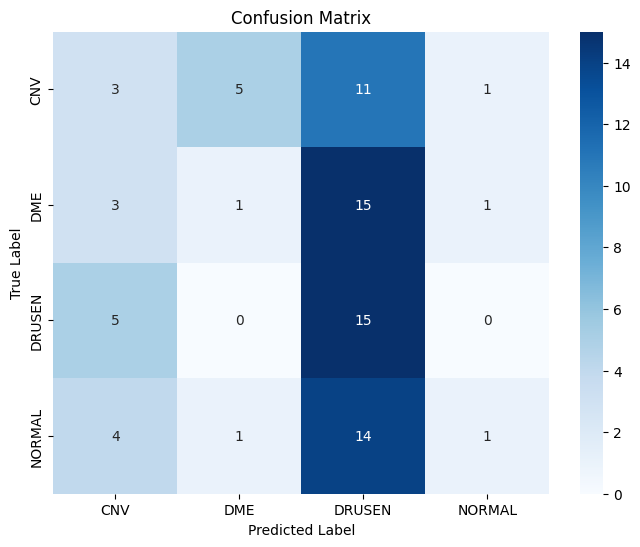

In [ ]:
conf_matrix = confusion_matrix(true_labels, test_predictions_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

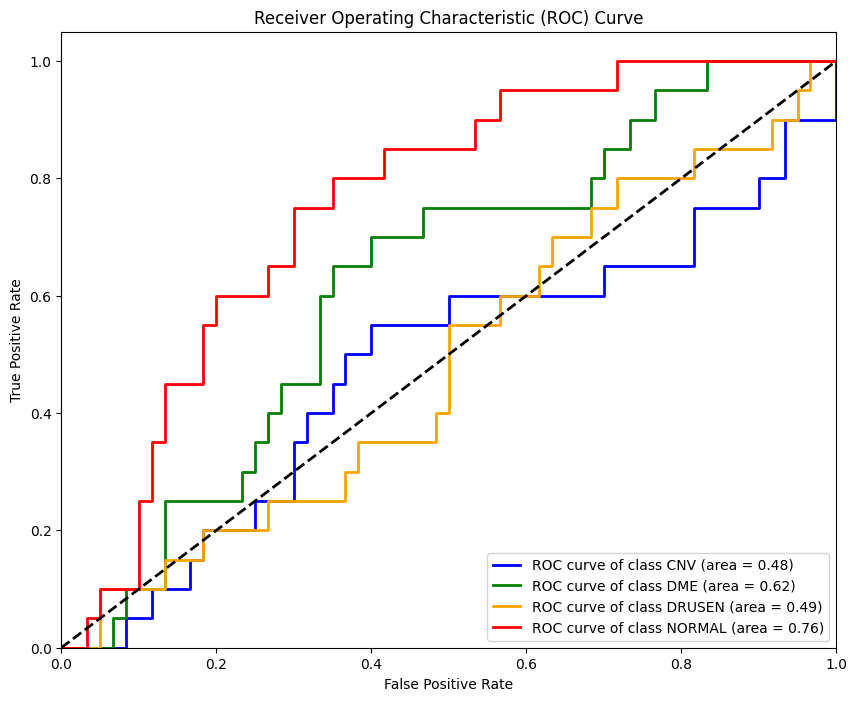

In [ ]:
def plot_multiclass_roc(test_labels, test_predictions):
    test_labels_binarized = label_binarize(test_labels, classes=[0, 1, 2, 3])
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(categories)):
        fpr[i], tpr[i], _ = roc_curve(test_labels_binarized[:, i], test_predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i, color in zip(range(len(categories)), ['blue', 'green', 'orange', 'red']):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {categories[i]} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC Curve for multi-class
plot_multiclass_roc(true_labels, test_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


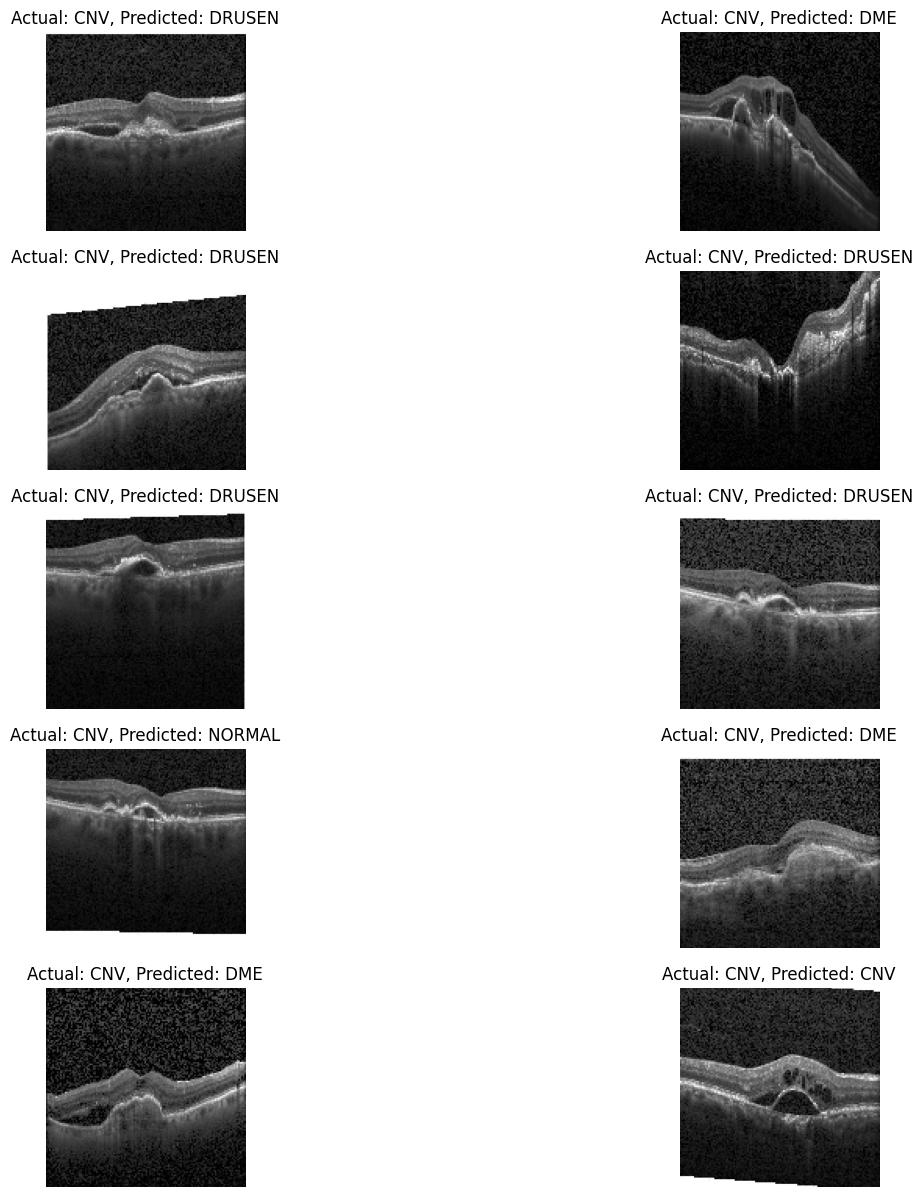

In [ ]:
def plot_sample_predictions(test_generator, num_samples=10):
    test_generator.reset()
    sample_images, sample_labels = next(test_generator)
    predictions = model.predict(sample_images)
    predicted_labels = np.argmax(predictions, axis=1)

    plt.figure(figsize=(15, 15))
    for i in range(num_samples):
        plt.subplot(5, 2, i+1)
        plt.imshow(sample_images[i])
        plt.title(f"Actual: {categories[np.argmax(sample_labels[i])]}, Predicted: {categories[predicted_labels[i]]}")
        plt.axis('off')
    plt.show()

# Show 10 samples with predictions
plot_sample_predictions(test_generator)